<a href="https://colab.research.google.com/github/Sadi-Rahman/CVPR_18-38573-2/blob/main/CVPR_Pa-1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist

import os
import random
import numpy as np
import matplotlib.pyplot as plt

In [31]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(f"Shape of x_train: {x_train.shape}")
print(f"Shape of y_train: {y_train.shape}")
print()
print(f"Shape of x_test: {x_test.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of x_train: (60000, 28, 28)
Shape of y_train: (60000,)

Shape of x_test: (10000, 28, 28)
Shape of y_test: (10000,)


Image (#7): Which is digit '3'


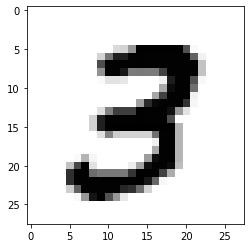

In [34]:
digit = 7
a = x_train[digit]
plt.imshow(a, cmap='gray_r')
print(f"Image (#{digit}): Which is digit '{y_train[digit]}'")

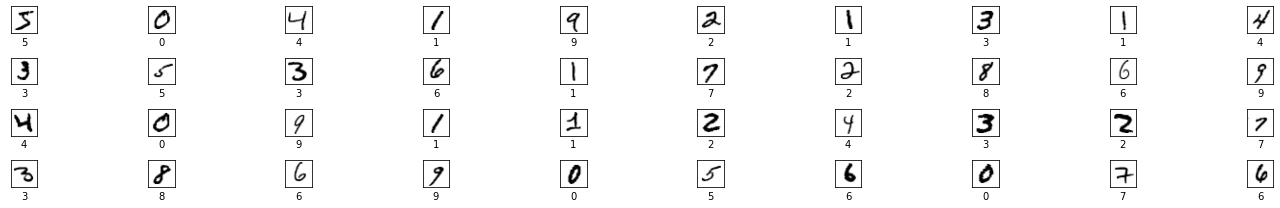

In [35]:
ROWS = 4
COLS = 10
i = 0

plt.figure(figsize=(20,3))
for r in range(ROWS):
    for c in range(COLS):
        plt.subplot(ROWS, COLS, i+1)
        plt.imshow(x_train[i], cmap=plt.cm.gray_r)
        
        plt.xticks([])
        plt.yticks([])
        plt.xlabel(y_train[i])
        i += 1
plt.tight_layout()
plt.show()

In [36]:
x_train = x_train.reshape(-1, 28,28,1)
x_test = x_test.reshape(-1, 28,28,1)

In [37]:
model = keras.Sequential([

    keras.Input(shape=(28,28,1)),

    layers.Conv2D(filters=32, kernel_size=(5,5), activation='relu'), # input->(32,32) output->(28,28)
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),

    layers.Dense(10, activation='softmax')
])
model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 10, 10, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 1, 1, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 64)               

In [38]:
model.compile(
   optimizer='RMSProp', 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)

h = model.fit(x=x_train, y=y_train, epochs=15, validation_split=0.2, batch_size=32)

Epoch 1/15
1500/1500 [==============================] - 6s 3ms/step - loss: 0.3859 - accuracy: 0.9196 - val_loss: 0.0989 - val_accuracy: 0.9747
Epoch 2/15
1500/1500 [==============================] - 5s 3ms/step - loss: 0.1020 - accuracy: 0.9735 - val_loss: 0.0926 - val_accuracy: 0.9753
Epoch 3/15
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0857 - accuracy: 0.9782 - val_loss: 0.0951 - val_accuracy: 0.9788
Epoch 4/15
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0769 - accuracy: 0.9820 - val_loss: 0.0947 - val_accuracy: 0.9778
Epoch 5/15
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0762 - accuracy: 0.9833 - val_loss: 0.0886 - val_accuracy: 0.9805
Epoch 6/15
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0832 - accuracy: 0.9835 - val_loss: 0.1461 - val_accuracy: 0.9791
Epoch 7/15
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0786 - accuracy: 0.9841 - val_loss: 0.0941 - val_accuracy:

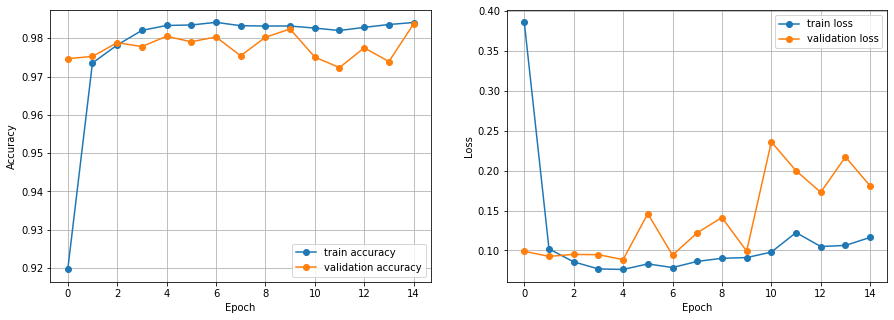

In [39]:

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h.history['loss'], 'o-', label='train loss')
plt.plot(h.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

In [40]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('\nTest Accuracy:', test_acc)
print('\nTest Loss:', test_loss)

313/313 [==============================] - 1s 2ms/step - loss: 0.1944 - accuracy: 0.9833

Test Accuracy: 0.983299970626831

Test Loss: 0.19437815248966217


In [41]:
predictions = model.predict(x_test)

In [42]:
predictions[0]

array([8.4014749e-36, 1.2913628e-17, 2.1479327e-18, 5.1307474e-20,
       8.2838380e-17, 6.5399709e-24, 0.0000000e+00, 1.0000000e+00,
       1.5147103e-26, 1.8244781e-14], dtype=float32)

In [43]:
np.argmax(predictions[0])

7

In [44]:
x_train=x_train=x_train.reshape(-1,28,28)
x_test=x_test=x_test.reshape(-1,28,28)

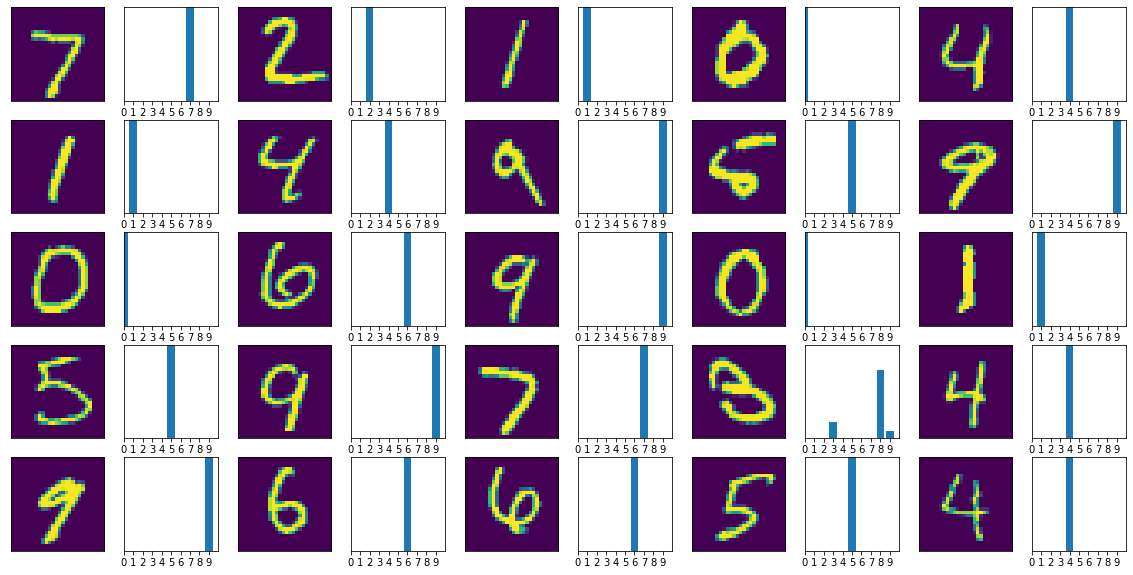

In [45]:
rows = 5
cols = 5

plt.figure(figsize=(20,10))
for i in range(25):
    
    plt.subplot(rows, 2*cols, 2*i+1)
    plt.imshow(x_test[i])
    plt.xticks([])
    plt.yticks([])
    plt.subplot(rows, 2*cols, 2*i+2)
    plt.bar(range(10), predictions[i])
    plt.yticks([])
    plt.xticks(range(0,10))
    plt.ylim([0,1])
    plt.xlim([0,10])
    
plt.show()